<a href="https://colab.research.google.com/github/kunalbathija/Udemy-TF-2.0/blob/master/Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
data = load_breast_cancer()

In [0]:
type(data)

sklearn.utils.Bunch

In [0]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
data.data.shape

(569, 30)

In [0]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [0]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [0]:
data.target.shape

(569,)

In [0]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

30

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(D,)),
      tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=1000)

print("Train Score: ",model.evaluate(X_train, Y_train))
print("Test Score: ", model.evaluate(X_test, Y_test))

Epoch 1/1000
12/12 [==============================] - 0s 9ms/step - loss: 1.1155 - accuracy: 0.3753 - val_loss: 1.1454 - val_accuracy: 0.3830
Epoch 2/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.0282 - accuracy: 0.4278 - val_loss: 1.0640 - val_accuracy: 0.4468
Epoch 3/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.9535 - accuracy: 0.4646 - val_loss: 0.9901 - val_accuracy: 0.5053
Epoch 4/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.8815 - accuracy: 0.5197 - val_loss: 0.9228 - val_accuracy: 0.5479
Epoch 5/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.8189 - accuracy: 0.5486 - val_loss: 0.8634 - val_accuracy: 0.5904
Epoch 6/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.7642 - accuracy: 0.6089 - val_loss: 0.8082 - val_accuracy: 0.6330
Epoch 7/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.7150 - accuracy: 0.6404 - val_loss: 0.7580 - val_accuracy: 0.6489
Epoch 

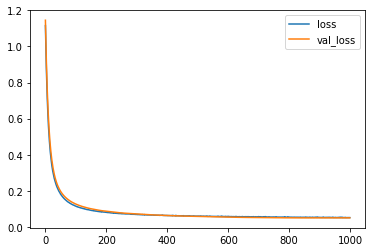

In [0]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label="loss")
plt.plot(r.history['val_loss'], label="val_loss")
plt.legend()

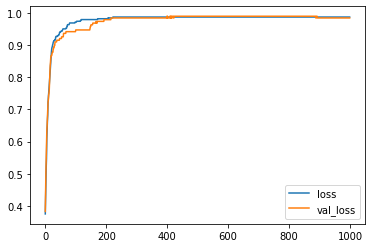

In [0]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label="loss")
plt.plot(r.history['val_accuracy'], label="val_loss")
plt.legend()

# Part 2 Making Predictions

In [35]:
P = model.predict(X_test)
P

array([[1.00000000e+00],
       [6.37488868e-13],
       [9.97500062e-01],
       [3.06011170e-05],
       [4.81835008e-03],
       [7.44462013e-04],
       [9.98595536e-01],
       [6.72728181e-01],
       [9.96921360e-01],
       [5.28348892e-12],
       [6.39773011e-01],
       [9.99995410e-01],
       [9.93425965e-01],
       [9.99789476e-01],
       [9.83988762e-01],
       [9.99998152e-01],
       [3.09148431e-03],
       [4.58598137e-04],
       [9.85397279e-01],
       [9.99983549e-01],
       [7.51178140e-06],
       [9.99979317e-01],
       [9.99956012e-01],
       [8.20732117e-01],
       [1.26660515e-10],
       [9.98880744e-01],
       [9.99997020e-01],
       [9.99947906e-01],
       [9.99999881e-01],
       [9.97684360e-01],
       [9.99997377e-01],
       [9.84865785e-01],
       [6.98356986e-01],
       [9.93501425e-01],
       [9.99121189e-01],
       [9.99974370e-01],
       [9.99934793e-01],
       [1.19652350e-08],
       [9.98374581e-01],
       [9.99338210e-01],


In [39]:
import numpy as np
P = np.round(P).flatten()
P

array([1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       1.], dtype=float32)

In [40]:
print("Manually calculated accuracy: ", np.mean(P == Y_test))
print("Evaluate ouput: ", model.evaluate(X_test, Y_test))

Manually calculated accuracy:  0.9840425531914894
6/6 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9840
Evaluate ouput:  [0.05008290335536003, 0.9840425252914429]
